In [1]:
# This dataset is for sensor indoor and paired with stationary and weather.
# so weather is kind of non-relevant, versus stationary has the lowest error rate.

In [2]:
import numpy as np
import pandas as pd
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Using TensorFlow backend.


In [3]:
Wearable = pd.read_excel('Data_Folder/Demo4_20/4_20_wearable_inside.xlsx',header=0,index_col=0)
Stationary = pd.read_excel('Data_Folder/Demo4_20/4_20_stationary.xlsx',header=0,index_col=False)
Weather = pd.read_csv('Data_Folder/Demo4_20/weather_4_20.txt',delimiter=',',header=None,index_col=False)
Weather.columns=['DTime','Bar','TempIn','HumIn','TempOut','Wind','Wind10','Wdir','HumOut','RainRate','UV','Solar']

In [4]:
Stationary.drop([0,554],inplace=True)

from datetime import datetime
Stationary = Stationary.resample('1T',on='Time').mean()

Wearable.index = range(Wearable.shape[0])
Wearable = Wearable.iloc[:556,:]

from datetime import datetime
for i in range(Weather.shape[0]):
    Weather.set_value(i, 'New_Time', datetime.strptime(Weather.iloc[i,0], '%Y-%m-%d %H:%M:%S'), takeable=False)
Weather = Weather.resample('1T', on='New_Time').mean()
Weather = Weather.iloc[632:1188]

Wearable.index = range(Wearable.shape[0])
Wearable.drop(columns=['Time(s)'],inplace=True)
Wearable.drop(Wearable.columns[0],axis=1,inplace=True)
Stationary.index = range(Stationary.shape[0])
Weather.index = range(Weather.shape[0])
#Stationary = Wea_Stat_Wearable.fillna(method='ffill')
Stationary = Stationary.fillna(method='ffill')
Wearable = Wearable.fillna(method='ffill')
#Wea_Stat = pd.concat([Weather, Stationary],axis=1)
#Wea_Stat


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [5]:
#Wea_Stat

In [6]:
Wea_Stat = pd.concat([Weather,Stationary],axis=1)

In [34]:
Wea_Stat


,Bar,TempIn,HumIn,TempOut,Wind,Wind10,Wdir,HumOut,RainRate,UV,Solar,violetData,blueData,greenData,yellowData,orangeData,redData
0,1000.536373,22.777778,38.000000,15.555556,1.415624,1.788157,334.000000,77.000000,0.0,27.500000,441.666667,880.024658,801.235107,1076.382324,958.695557,1329.701050,762.407349
1,1000.536373,22.777778,38.000000,15.555556,1.564637,1.788157,342.166667,77.000000,0.0,28.000000,449.166667,802.443542,850.522400,1206.885498,1014.467163,1142.092285,800.317078
2,1000.536373,22.777778,38.000000,15.555556,0.447039,1.713650,352.833333,77.000000,0.0,28.166667,449.666667,503.698303,580.073975,268.556305,480.790131,380.052734,661.314636
3,1000.536373,22.777778,38.000000,15.555556,2.458716,1.341118,292.333333,77.000000,0.0,29.000000,449.500000,562.752625,760.794189,887.637878,901.000732,697.246887,641.938538
4,1000.536373,22.777778,38.000000,15.555556,2.160690,1.490131,272.166667,75.333333,0.0,29.000000,454.666667,567.384277,770.904419,890.873535,908.693359,701.115112,648.678101
5,1000.536373,22.777778,38.000000,15.555556,1.966973,1.788157,276.400000,76.000000,0.0,29.600000,469.800000,556.962952,759.530396,863.910034,889.461731,677.905762,635.199036
6,1000.536373,22.777778,38.000000,15.555556,1.862664,1.788157,283.833333,75.000000,0.0,30.666667,505.500000,558.120911,758.266663,866.067139,883.692261,677.905762,636.041504
7,1000.536373,22.777778,38.000000,15.555556,2.905755,1.788157,287.000000,75.333333,0.0,32.666667,546.000000,545.383667,745.628845,840.182190,861.575928,658.564697,621.720032
8,1000.536373,22.777778,38.000000,15.555556,2.533222,1.788157,289.166667,77.000000,0.0,31.166667,528.000000,530.330627,729.199768,808.904541,831.766968,633.421265,603.186340
9,1000.536373,22.777778,37.833333,15.555556,3.650821,1.862664,292.500000,78.000000,0.0,33.000000,559.333333,522.225159,722.880859,787.333740,813.496887,619.882446,593.077087


### Weather Model 

### decay learning
https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/
<br>may wanna consider comparing adam, sgd, SGD+momentum, SGD+Nest.+momentum

In [7]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(Wea_Stat, Wearable, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train_weather = X_train[:,:11]
X_train_stationary = X_train[:,11:]
X_test_weather = X_test[:,:11]
X_test_stationary = X_test[:,11:]
# Initialising the ANN

model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 6))

#adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
# Compiling the ANN
#sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
#adagrad = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
model.compile(optimizer = adadelta, loss = 'mean_squared_error')

# Fitting the ANN to the Training set
history = model.fit(X_train_weather, y_train, batch_size = 10, epochs = 2000)

Epoch 1/2000
444/444 [==============================] - 0s 788us/step - loss: 3247291.9654
Epoch 2/2000
444/444 [==============================] - 0s 156us/step - loss: 381439.2369
Epoch 3/2000
444/444 [==============================] - 0s 158us/step - loss: 409117.2353
Epoch 4/2000
444/444 [==============================] - 0s 157us/step - loss: 342691.0170
Epoch 5/2000
444/444 [==============================] - 0s 156us/step - loss: 292831.2338
Epoch 6/2000
444/444 [==============================] - 0s 181us/step - loss: 280854.7719
Epoch 7/2000
444/444 [==============================] - 0s 162us/step - loss: 280002.7871
Epoch 8/2000
444/444 [==============================] - 0s 171us/step - loss: 254224.7893
Epoch 9/2000
444/444 [==============================] - 0s 182us/step - loss: 256756.8760
Epoch 10/2000
444/444 [==============================] - 0s 241us/step - loss: 250972.9303
Epoch 11/2000
444/444 [==============================] - 0s 152us/step - loss: 244268.3536
Epoch 1

444/444 [==============================] - 0s 163us/step - loss: 208607.1655
Epoch 91/2000
444/444 [==============================] - 0s 158us/step - loss: 209137.0740
Epoch 92/2000
444/444 [==============================] - 0s 158us/step - loss: 207928.1497
Epoch 93/2000
444/444 [==============================] - 0s 152us/step - loss: 208159.5009
Epoch 94/2000
444/444 [==============================] - 0s 154us/step - loss: 207360.9656
Epoch 95/2000
444/444 [==============================] - 0s 157us/step - loss: 208571.4121
Epoch 96/2000
444/444 [==============================] - 0s 171us/step - loss: 208490.7072
Epoch 97/2000
444/444 [==============================] - 0s 160us/step - loss: 207318.5328
Epoch 98/2000
444/444 [==============================] - 0s 158us/step - loss: 206838.3778
Epoch 99/2000
444/444 [==============================] - 0s 152us/step - loss: 207131.6424
Epoch 100/2000
444/444 [==============================] - 0s 156us/step - loss: 207050.1595
Epoch 101/20

444/444 [==============================] - 0s 163us/step - loss: 190913.0807
Epoch 180/2000
444/444 [==============================] - 0s 162us/step - loss: 189575.7746
Epoch 181/2000
444/444 [==============================] - 0s 163us/step - loss: 190988.1014
Epoch 182/2000
444/444 [==============================] - 0s 154us/step - loss: 189885.1331
Epoch 183/2000
444/444 [==============================] - 0s 154us/step - loss: 190501.1649
Epoch 184/2000
444/444 [==============================] - 0s 177us/step - loss: 191989.4237
Epoch 185/2000
444/444 [==============================] - 0s 152us/step - loss: 189663.9719
Epoch 186/2000
444/444 [==============================] - 0s 152us/step - loss: 190554.6709
Epoch 187/2000
444/444 [==============================] - 0s 154us/step - loss: 189914.4688
Epoch 188/2000
444/444 [==============================] - 0s 153us/step - loss: 189650.1433
Epoch 189/2000
444/444 [==============================] - 0s 153us/step - loss: 188623.9962
Epo

Epoch 268/2000
444/444 [==============================] - 0s 168us/step - loss: 175771.7126
Epoch 269/2000
444/444 [==============================] - 0s 155us/step - loss: 176313.7138
Epoch 270/2000
444/444 [==============================] - 0s 157us/step - loss: 176682.4468
Epoch 271/2000
444/444 [==============================] - 0s 156us/step - loss: 177481.9130
Epoch 272/2000
444/444 [==============================] - 0s 156us/step - loss: 176919.6066
Epoch 273/2000
444/444 [==============================] - 0s 152us/step - loss: 176745.7976
Epoch 274/2000
444/444 [==============================] - 0s 158us/step - loss: 176148.7213
Epoch 275/2000
444/444 [==============================] - 0s 159us/step - loss: 174572.4028
Epoch 276/2000
444/444 [==============================] - 0s 194us/step - loss: 176521.2938
Epoch 277/2000
444/444 [==============================] - 0s 196us/step - loss: 175896.4707
Epoch 278/2000
444/444 [==============================] - 0s 180us/step - loss: 

444/444 [==============================] - 0s 183us/step - loss: 161458.9480
Epoch 358/2000
444/444 [==============================] - 0s 159us/step - loss: 161813.2160
Epoch 359/2000
444/444 [==============================] - 0s 170us/step - loss: 160747.9689
Epoch 360/2000
444/444 [==============================] - 0s 228us/step - loss: 158306.4593
Epoch 361/2000
444/444 [==============================] - 0s 213us/step - loss: 162513.5143
Epoch 362/2000
444/444 [==============================] - 0s 156us/step - loss: 162436.3047
Epoch 363/2000
444/444 [==============================] - 0s 154us/step - loss: 161609.7887
Epoch 364/2000
444/444 [==============================] - 0s 153us/step - loss: 161547.0778
Epoch 365/2000
444/444 [==============================] - 0s 154us/step - loss: 160949.4066
Epoch 366/2000
444/444 [==============================] - 0s 160us/step - loss: 159581.8050
Epoch 367/2000
444/444 [==============================] - 0s 154us/step - loss: 161759.0048
Epo

444/444 [==============================] - 0s 159us/step - loss: 150404.0704
Epoch 447/2000
444/444 [==============================] - 0s 154us/step - loss: 149899.4445
Epoch 448/2000
444/444 [==============================] - 0s 156us/step - loss: 150974.4667
Epoch 449/2000
444/444 [==============================] - 0s 159us/step - loss: 150898.8298
Epoch 450/2000
444/444 [==============================] - 0s 155us/step - loss: 149292.6273
Epoch 451/2000
444/444 [==============================] - 0s 157us/step - loss: 150101.4479
Epoch 452/2000
444/444 [==============================] - 0s 157us/step - loss: 150316.0785
Epoch 453/2000
444/444 [==============================] - 0s 162us/step - loss: 148838.2438
Epoch 454/2000
444/444 [==============================] - 0s 156us/step - loss: 148442.5919
Epoch 455/2000
444/444 [==============================] - 0s 158us/step - loss: 151335.5276
Epoch 456/2000
444/444 [==============================] - 0s 154us/step - loss: 149675.1800
Epo

Epoch 535/2000
444/444 [==============================] - 0s 191us/step - loss: 141394.9165
Epoch 536/2000
444/444 [==============================] - 0s 152us/step - loss: 142657.1848
Epoch 537/2000
444/444 [==============================] - 0s 148us/step - loss: 141568.2687
Epoch 538/2000
444/444 [==============================] - 0s 154us/step - loss: 142158.1466
Epoch 539/2000
444/444 [==============================] - 0s 148us/step - loss: 143167.4488
Epoch 540/2000
444/444 [==============================] - 0s 163us/step - loss: 143358.7707
Epoch 541/2000
444/444 [==============================] - 0s 237us/step - loss: 142499.0371
Epoch 542/2000
444/444 [==============================] - 0s 239us/step - loss: 142645.2343
Epoch 543/2000
444/444 [==============================] - 0s 201us/step - loss: 144084.3415
Epoch 544/2000
444/444 [==============================] - 0s 185us/step - loss: 140993.7251
Epoch 545/2000
444/444 [==============================] - 0s 156us/step - loss: 

444/444 [==============================] - 0s 156us/step - loss: 136264.7566
Epoch 625/2000
444/444 [==============================] - 0s 155us/step - loss: 135345.7555
Epoch 626/2000
444/444 [==============================] - 0s 150us/step - loss: 136177.9442
Epoch 627/2000
444/444 [==============================] - 0s 156us/step - loss: 135801.7617
Epoch 628/2000
444/444 [==============================] - 0s 191us/step - loss: 135245.8098
Epoch 629/2000
444/444 [==============================] - 0s 171us/step - loss: 133063.3595
Epoch 630/2000
444/444 [==============================] - 0s 171us/step - loss: 136704.9100
Epoch 631/2000
444/444 [==============================] - 0s 169us/step - loss: 135146.0910
Epoch 632/2000
444/444 [==============================] - 0s 173us/step - loss: 135597.6799
Epoch 633/2000
444/444 [==============================] - 0s 168us/step - loss: 134981.7017
Epoch 634/2000
444/444 [==============================] - 0s 174us/step - loss: 135127.7219
Epo

444/444 [==============================] - 0s 156us/step - loss: 129320.3013
Epoch 714/2000
444/444 [==============================] - 0s 154us/step - loss: 126230.5766
Epoch 715/2000
444/444 [==============================] - 0s 154us/step - loss: 127860.5699
Epoch 716/2000
444/444 [==============================] - 0s 156us/step - loss: 131490.4474
Epoch 717/2000
444/444 [==============================] - 0s 166us/step - loss: 129020.7665
Epoch 718/2000
444/444 [==============================] - 0s 148us/step - loss: 128890.9144
Epoch 719/2000
444/444 [==============================] - 0s 137us/step - loss: 129021.7898
Epoch 720/2000
444/444 [==============================] - 0s 144us/step - loss: 130227.4798
Epoch 721/2000
444/444 [==============================] - 0s 184us/step - loss: 129638.8106
Epoch 722/2000
444/444 [==============================] - 0s 156us/step - loss: 129883.0058
Epoch 723/2000
444/444 [==============================] - 0s 151us/step - loss: 127686.5428
Epo

444/444 [==============================] - 0s 157us/step - loss: 122873.2628
Epoch 803/2000
444/444 [==============================] - 0s 156us/step - loss: 122404.9510
Epoch 804/2000
444/444 [==============================] - 0s 169us/step - loss: 120890.0421
Epoch 805/2000
444/444 [==============================] - 0s 166us/step - loss: 124058.9765
Epoch 806/2000
444/444 [==============================] - 0s 158us/step - loss: 122689.8877
Epoch 807/2000
444/444 [==============================] - 0s 161us/step - loss: 122567.4543
Epoch 808/2000
444/444 [==============================] - 0s 164us/step - loss: 123090.7758
Epoch 809/2000
444/444 [==============================] - 0s 205us/step - loss: 122510.2518
Epoch 810/2000
444/444 [==============================] - 0s 313us/step - loss: 121234.0548
Epoch 811/2000
444/444 [==============================] - 0s 179us/step - loss: 123327.5031
Epoch 812/2000
444/444 [==============================] - 0s 175us/step - loss: 121689.9874
Epo

444/444 [==============================] - 0s 155us/step - loss: 116965.7987
Epoch 892/2000
444/444 [==============================] - 0s 153us/step - loss: 117764.8758
Epoch 893/2000
444/444 [==============================] - 0s 154us/step - loss: 118997.7710
Epoch 894/2000
444/444 [==============================] - 0s 154us/step - loss: 115663.3630
Epoch 895/2000
444/444 [==============================] - 0s 151us/step - loss: 118010.7428
Epoch 896/2000
444/444 [==============================] - 0s 153us/step - loss: 116444.5246
Epoch 897/2000
444/444 [==============================] - 0s 154us/step - loss: 115505.6454
Epoch 898/2000
444/444 [==============================] - 0s 161us/step - loss: 115112.1190
Epoch 899/2000
444/444 [==============================] - 0s 155us/step - loss: 116555.3701
Epoch 900/2000
444/444 [==============================] - 0s 156us/step - loss: 116739.9146
Epoch 901/2000
444/444 [==============================] - 0s 153us/step - loss: 117182.7034
Epo

Epoch 980/2000
444/444 [==============================] - 0s 168us/step - loss: 112470.2727
Epoch 981/2000
444/444 [==============================] - 0s 165us/step - loss: 114601.0669
Epoch 982/2000
444/444 [==============================] - 0s 153us/step - loss: 112452.7052
Epoch 983/2000
444/444 [==============================] - 0s 155us/step - loss: 111992.6704
Epoch 984/2000
444/444 [==============================] - 0s 157us/step - loss: 111578.4165
Epoch 985/2000
444/444 [==============================] - 0s 158us/step - loss: 110886.8764
Epoch 986/2000
444/444 [==============================] - 0s 161us/step - loss: 112311.7897
Epoch 987/2000
444/444 [==============================] - 0s 168us/step - loss: 110222.6374
Epoch 988/2000
444/444 [==============================] - 0s 169us/step - loss: 109557.7503
Epoch 989/2000
444/444 [==============================] - 0s 185us/step - loss: 111955.2749
Epoch 990/2000
444/444 [==============================] - 0s 209us/step - loss: 

444/444 [==============================] - 0s 156us/step - loss: 105881.0730
Epoch 1069/2000
444/444 [==============================] - 0s 151us/step - loss: 107152.6409
Epoch 1070/2000
444/444 [==============================] - 0s 156us/step - loss: 108339.3545
Epoch 1071/2000
444/444 [==============================] - 0s 165us/step - loss: 106749.7244
Epoch 1072/2000
444/444 [==============================] - 0s 157us/step - loss: 107659.9426
Epoch 1073/2000
444/444 [==============================] - 0s 156us/step - loss: 105727.5277
Epoch 1074/2000
444/444 [==============================] - 0s 152us/step - loss: 106534.8859
Epoch 1075/2000
444/444 [==============================] - 0s 149us/step - loss: 105007.3534
Epoch 1076/2000
444/444 [==============================] - 0s 159us/step - loss: 105811.8501
Epoch 1077/2000
444/444 [==============================] - 0s 172us/step - loss: 105779.0116
Epoch 1078/2000
444/444 [==============================] - 0s 153us/step - loss: 10616

444/444 [==============================] - 0s 144us/step - loss: 100510.7165
Epoch 1157/2000
444/444 [==============================] - 0s 136us/step - loss: 99832.8560
Epoch 1158/2000
444/444 [==============================] - 0s 149us/step - loss: 98484.3526
Epoch 1159/2000
444/444 [==============================] - 0s 151us/step - loss: 103111.0514
Epoch 1160/2000
444/444 [==============================] - 0s 153us/step - loss: 100206.3158
Epoch 1161/2000
444/444 [==============================] - 0s 153us/step - loss: 101836.2456
Epoch 1162/2000
444/444 [==============================] - 0s 155us/step - loss: 100469.5769
Epoch 1163/2000
444/444 [==============================] - 0s 149us/step - loss: 101200.2209
Epoch 1164/2000
444/444 [==============================] - 0s 152us/step - loss: 98238.5373
Epoch 1165/2000
444/444 [==============================] - 0s 155us/step - loss: 100178.5070
Epoch 1166/2000
444/444 [==============================] - 0s 163us/step - loss: 99383.96

444/444 [==============================] - 0s 178us/step - loss: 95684.7854
Epoch 1246/2000
444/444 [==============================] - 0s 157us/step - loss: 96243.8674
Epoch 1247/2000
444/444 [==============================] - 0s 162us/step - loss: 94214.7054
Epoch 1248/2000
444/444 [==============================] - 0s 150us/step - loss: 96800.1815
Epoch 1249/2000
444/444 [==============================] - 0s 151us/step - loss: 96590.7405
Epoch 1250/2000
444/444 [==============================] - 0s 153us/step - loss: 94970.1761
Epoch 1251/2000
444/444 [==============================] - 0s 150us/step - loss: 95036.9782
Epoch 1252/2000
444/444 [==============================] - 0s 153us/step - loss: 97501.3302
Epoch 1253/2000
444/444 [==============================] - 0s 156us/step - loss: 96180.8445
Epoch 1254/2000
444/444 [==============================] - 0s 158us/step - loss: 96156.7826
Epoch 1255/2000
444/444 [==============================] - 0s 175us/step - loss: 96108.0604
Epoc

444/444 [==============================] - 0s 157us/step - loss: 91627.6020
Epoch 1335/2000
444/444 [==============================] - 0s 160us/step - loss: 92016.0041
Epoch 1336/2000
444/444 [==============================] - 0s 155us/step - loss: 90359.4888
Epoch 1337/2000
444/444 [==============================] - 0s 159us/step - loss: 91965.4954
Epoch 1338/2000
444/444 [==============================] - 0s 171us/step - loss: 91154.2495
Epoch 1339/2000
444/444 [==============================] - 0s 155us/step - loss: 90551.3100
Epoch 1340/2000
444/444 [==============================] - 0s 159us/step - loss: 92485.0648
Epoch 1341/2000
444/444 [==============================] - 0s 178us/step - loss: 90930.9276
Epoch 1342/2000
444/444 [==============================] - 0s 165us/step - loss: 90464.3616
Epoch 1343/2000
444/444 [==============================] - 0s 152us/step - loss: 92107.0519
Epoch 1344/2000
444/444 [==============================] - 0s 149us/step - loss: 91532.8613
Epoc

Epoch 1423/2000
444/444 [==============================] - 0s 177us/step - loss: 85248.4530
Epoch 1424/2000
444/444 [==============================] - 0s 150us/step - loss: 87797.3147
Epoch 1425/2000
444/444 [==============================] - 0s 156us/step - loss: 87361.0998
Epoch 1426/2000
444/444 [==============================] - 0s 154us/step - loss: 87548.6199
Epoch 1427/2000
444/444 [==============================] - 0s 179us/step - loss: 87199.8371
Epoch 1428/2000
444/444 [==============================] - 0s 150us/step - loss: 86760.9685
Epoch 1429/2000
444/444 [==============================] - 0s 162us/step - loss: 87852.3699
Epoch 1430/2000
444/444 [==============================] - 0s 168us/step - loss: 87616.5066
Epoch 1431/2000
444/444 [==============================] - 0s 153us/step - loss: 87821.0175
Epoch 1432/2000
444/444 [==============================] - 0s 155us/step - loss: 87202.7648
Epoch 1433/2000
444/444 [==============================] - 0s 177us/step - loss:

444/444 [==============================] - 0s 183us/step - loss: 85158.3629
Epoch 1513/2000
444/444 [==============================] - 0s 159us/step - loss: 83043.6928
Epoch 1514/2000
444/444 [==============================] - 0s 151us/step - loss: 85702.6779
Epoch 1515/2000
444/444 [==============================] - 0s 200us/step - loss: 81506.3290
Epoch 1516/2000
444/444 [==============================] - 0s 156us/step - loss: 84083.2193
Epoch 1517/2000
444/444 [==============================] - 0s 169us/step - loss: 84171.9520
Epoch 1518/2000
444/444 [==============================] - 0s 174us/step - loss: 83200.0739
Epoch 1519/2000
444/444 [==============================] - 0s 163us/step - loss: 83037.0315
Epoch 1520/2000
444/444 [==============================] - 0s 169us/step - loss: 82684.6589
Epoch 1521/2000
444/444 [==============================] - 0s 244us/step - loss: 83446.6267
Epoch 1522/2000
444/444 [==============================] - 0s 180us/step - loss: 83803.5450
Epoc

444/444 [==============================] - 0s 159us/step - loss: 82170.7687
Epoch 1602/2000
444/444 [==============================] - 0s 152us/step - loss: 80398.7311
Epoch 1603/2000
444/444 [==============================] - 0s 159us/step - loss: 78943.7166
Epoch 1604/2000
444/444 [==============================] - 0s 151us/step - loss: 79487.3076
Epoch 1605/2000
444/444 [==============================] - 0s 157us/step - loss: 79150.9198
Epoch 1606/2000
444/444 [==============================] - 0s 158us/step - loss: 80743.5029
Epoch 1607/2000
444/444 [==============================] - 0s 151us/step - loss: 80386.6851
Epoch 1608/2000
444/444 [==============================] - 0s 152us/step - loss: 80503.9227
Epoch 1609/2000
444/444 [==============================] - 0s 155us/step - loss: 79482.2002
Epoch 1610/2000
444/444 [==============================] - 0s 153us/step - loss: 79466.4124
Epoch 1611/2000
444/444 [==============================] - 0s 155us/step - loss: 78351.2320
Epoc

Epoch 1690/2000
444/444 [==============================] - 0s 162us/step - loss: 75371.9226
Epoch 1691/2000
444/444 [==============================] - 0s 175us/step - loss: 77401.1787
Epoch 1692/2000
444/444 [==============================] - 0s 166us/step - loss: 76492.4021
Epoch 1693/2000
444/444 [==============================] - 0s 172us/step - loss: 75323.9470
Epoch 1694/2000
444/444 [==============================] - 0s 170us/step - loss: 77726.0092
Epoch 1695/2000
444/444 [==============================] - 0s 162us/step - loss: 77130.8209
Epoch 1696/2000
444/444 [==============================] - 0s 175us/step - loss: 79353.9138
Epoch 1697/2000
444/444 [==============================] - 0s 190us/step - loss: 75774.4930
Epoch 1698/2000
444/444 [==============================] - 0s 170us/step - loss: 75880.9253
Epoch 1699/2000
444/444 [==============================] - 0s 177us/step - loss: 75821.6686
Epoch 1700/2000
444/444 [==============================] - 0s 170us/step - loss:

444/444 [==============================] - 0s 153us/step - loss: 74165.2349
Epoch 1780/2000
444/444 [==============================] - 0s 155us/step - loss: 73536.3521
Epoch 1781/2000
444/444 [==============================] - 0s 154us/step - loss: 74807.0705
Epoch 1782/2000
444/444 [==============================] - 0s 151us/step - loss: 74434.0780
Epoch 1783/2000
444/444 [==============================] - 0s 155us/step - loss: 72167.9840
Epoch 1784/2000
444/444 [==============================] - 0s 157us/step - loss: 75183.0299
Epoch 1785/2000
444/444 [==============================] - 0s 154us/step - loss: 75288.7218
Epoch 1786/2000
444/444 [==============================] - 0s 157us/step - loss: 72721.6400
Epoch 1787/2000
444/444 [==============================] - 0s 152us/step - loss: 73318.9339
Epoch 1788/2000
444/444 [==============================] - 0s 154us/step - loss: 71489.7468
Epoch 1789/2000
444/444 [==============================] - 0s 153us/step - loss: 72420.6517
Epoc

444/444 [==============================] - 0s 140us/step - loss: 67002.0354
Epoch 1869/2000
444/444 [==============================] - 0s 143us/step - loss: 69541.7683
Epoch 1870/2000
444/444 [==============================] - 0s 143us/step - loss: 70571.1774
Epoch 1871/2000
444/444 [==============================] - 0s 139us/step - loss: 69871.1695
Epoch 1872/2000
444/444 [==============================] - 0s 134us/step - loss: 68879.0129
Epoch 1873/2000
444/444 [==============================] - 0s 139us/step - loss: 69805.1729
Epoch 1874/2000
444/444 [==============================] - 0s 135us/step - loss: 70450.8628
Epoch 1875/2000
444/444 [==============================] - 0s 140us/step - loss: 70025.1702
Epoch 1876/2000
444/444 [==============================] - 0s 144us/step - loss: 71059.5484
Epoch 1877/2000
444/444 [==============================] - 0s 151us/step - loss: 69983.8564
Epoch 1878/2000
444/444 [==============================] - 0s 142us/step - loss: 68719.1041
Epoc

Epoch 1957/2000
444/444 [==============================] - 0s 159us/step - loss: 68625.2758
Epoch 1958/2000
444/444 [==============================] - 0s 155us/step - loss: 65396.7597
Epoch 1959/2000
444/444 [==============================] - 0s 153us/step - loss: 67287.0231
Epoch 1960/2000
444/444 [==============================] - 0s 156us/step - loss: 67509.6370
Epoch 1961/2000
444/444 [==============================] - 0s 158us/step - loss: 65922.2918
Epoch 1962/2000
444/444 [==============================] - 0s 157us/step - loss: 66410.3043
Epoch 1963/2000
444/444 [==============================] - 0s 151us/step - loss: 65364.8929
Epoch 1964/2000
444/444 [==============================] - 0s 152us/step - loss: 67639.9316
Epoch 1965/2000
444/444 [==============================] - 0s 154us/step - loss: 66068.4058
Epoch 1966/2000
444/444 [==============================] - 0s 151us/step - loss: 64208.0509
Epoch 1967/2000
444/444 [==============================] - 0s 158us/step - loss:

In [35]:
X_train_weather.shape

(444, 11)

In [8]:
"""from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_weather,y_train)"""


'from sklearn.ensemble import RandomForestRegressor\n\nmodel = RandomForestRegressor()\nmodel.fit(X_train_weather,y_train)'

63589.46061262337


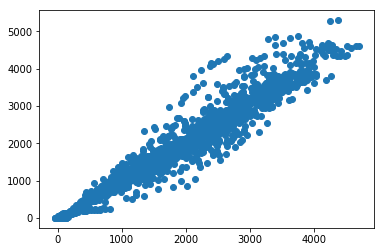

In [9]:
y_train_test_weather = model.predict(X_train_weather)
plt.scatter(y_train_test_weather,y_train)
mse = mean_squared_error(y_train_test_weather, y_train)
print mse

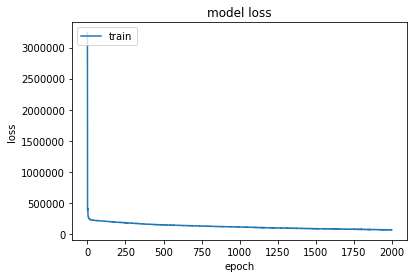

In [10]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Stationary Model 

In [11]:
"""
# Splitting the dataset into the Training set and Test set
#X_train, X_test, y_train, y_test = train_test_split(Stationary, Wearable, test_size = 0.2, random_state = 0)
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Initialising the ANN
model2 = Sequential()

# Adding the input layer and the first hidden layer
model2.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model2.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model2.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model2.add(Dense(units = 6))

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
# Compiling the ANN
model2.compile(optimizer = adam , loss = 'mean_squared_error')

# Fitting the ANN to the Training set
history = model2.fit(X_train_stationary, y_train, batch_size = 10, epochs = 2000)"""

"\n# Splitting the dataset into the Training set and Test set\n#X_train, X_test, y_train, y_test = train_test_split(Stationary, Wearable, test_size = 0.2, random_state = 0)\n#sc = StandardScaler()\n#X_train = sc.fit_transform(X_train)\n#X_test = sc.transform(X_test)\n\n# Initialising the ANN\nmodel2 = Sequential()\n\n# Adding the input layer and the first hidden layer\nmodel2.add(Dense(32, activation = 'relu', input_dim = 6))\n\n# Adding the second hidden layer\nmodel2.add(Dense(units = 32, activation = 'relu'))\n\n# Adding the third hidden layer\nmodel2.add(Dense(units = 32, activation = 'relu'))\n\n# Adding the output layer\n\nmodel2.add(Dense(units = 6))\n\nadam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)\n# Compiling the ANN\nmodel2.compile(optimizer = adam , loss = 'mean_squared_error')\n\n# Fitting the ANN to the Training set\nhistory = model2.fit(X_train_stationary, y_train, batch_size = 10, epochs = 2000)"

In [12]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Lasso,Ridge
ll = Lasso(alpha=0.1)
ll.fit(X_train_stationary, y_train)
y_train_test_stationary = ll.predict(X_train_stationary)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


4057.447356175202


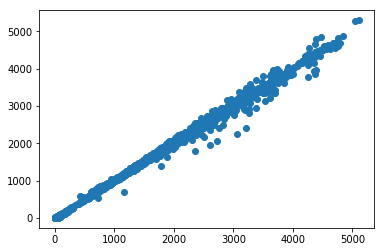

In [13]:
#y_train_test_stationary = model.predict(X_train_weather)
plt.scatter(y_train_test_stationary,y_train)
mse = mean_squared_error(y_train_test_stationary, y_train)
print mse

In [14]:
"""
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()"""

"\nplt.plot(history.history['loss'])\n#plt.plot(history.history['val_loss'])\nplt.title('model loss')\nplt.ylabel('loss')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='upper left')\nplt.show()"

### Weighted Function
https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

In [15]:
y_train_weather = pd.DataFrame(y_train_test_weather)
y_train_stationary = pd.DataFrame(y_train_test_stationary)
X_train_pred = pd.concat([y_train_weather, y_train_stationary],axis=1)


In [16]:
#Pred = [y_pred_weather,y_pred_wearable]
#X_train, X_test, y_train, y_test = train_test_split(train_pred, y_test, test_size = 0.2, random_state = 0)
classifier = Sequential()
# Adding the Single Perceptron or Shallow network
classifier.add(Dense(50,activation='relu', input_dim=12))
# Adding dropout to prevent overfitting
#classifier.add(Dropout(p=0.1))
# Adding the output layer
classifier.add(Dense(output_dim=6))
classifier.compile(optimizer = adadelta, loss = 'mean_squared_error')
#history = classifier.fit(X_train_pred, y_train, validation_data=(X_test,y_test),batch_size=10, nb_epoch=150)
history = classifier.fit(X_train_pred, y_train, batch_size=10, nb_epoch=500)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6)`
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Epoch 1/500
444/444 [==============================] - 0s 593us/step - loss: 1002500.1134
Epoch 2/500
444/444 [==============================] - 0s 127us/step - loss: 21140.0336
Epoch 3/500
444/444 [==============================] - 0s 131us/step - loss: 18880.5792
Epoch 4/500
444/444 [==============================] - 0s 132us/step - loss: 16907.6906
Epoch 5/500
444/444 [==============================] - 0s 118us/step - loss: 14283.9092
Epoch 6/500
444/444 [==============================] - 0s 117us/step - loss: 13749.8167
Epoch 7/500
444/444 [==============================] - 0s 128us/step - loss: 11656.3404
Epoch 8/500
444/444 [==============================] - 0s 118us/step - loss: 11641.0747
Epoch 9/500
444/444 [==============================] - 0s 125us/step - loss: 10570.9783
Epoch 10/500
444/444 [==============================] - 0s 127us/step - loss: 10541.9651
Epoch 11/500
444/444 [==============================] - 0s 118us/step - loss: 8683.7703
Epoch 12/500
444/444 [=======

444/444 [==============================] - 0s 115us/step - loss: 6607.7062
Epoch 95/500
444/444 [==============================] - 0s 129us/step - loss: 5081.3955
Epoch 96/500
444/444 [==============================] - 0s 116us/step - loss: 5457.7986
Epoch 97/500
444/444 [==============================] - 0s 113us/step - loss: 6657.3580
Epoch 98/500
444/444 [==============================] - 0s 125us/step - loss: 6494.2397
Epoch 99/500
444/444 [==============================] - 0s 115us/step - loss: 5481.6008
Epoch 100/500
444/444 [==============================] - 0s 115us/step - loss: 6290.7951
Epoch 101/500
444/444 [==============================] - 0s 153us/step - loss: 6447.6265
Epoch 102/500
444/444 [==============================] - 0s 180us/step - loss: 5934.5015
Epoch 103/500
444/444 [==============================] - 0s 118us/step - loss: 5619.8590
Epoch 104/500
444/444 [==============================] - 0s 116us/step - loss: 5913.9435
Epoch 105/500
444/444 [=================

444/444 [==============================] - 0s 114us/step - loss: 5790.3218
Epoch 187/500
444/444 [==============================] - 0s 116us/step - loss: 5211.3337
Epoch 188/500
444/444 [==============================] - 0s 124us/step - loss: 5413.4700
Epoch 189/500
444/444 [==============================] - 0s 127us/step - loss: 4821.2284
Epoch 190/500
444/444 [==============================] - 0s 116us/step - loss: 5030.1847
Epoch 191/500
444/444 [==============================] - 0s 123us/step - loss: 5519.3361
Epoch 192/500
444/444 [==============================] - 0s 114us/step - loss: 4791.7602
Epoch 193/500
444/444 [==============================] - 0s 113us/step - loss: 5373.6089
Epoch 194/500
444/444 [==============================] - 0s 113us/step - loss: 5806.4991
Epoch 195/500
444/444 [==============================] - 0s 117us/step - loss: 5514.3702
Epoch 196/500
444/444 [==============================] - 0s 111us/step - loss: 5099.4262
Epoch 197/500
444/444 [============

444/444 [==============================] - 0s 150us/step - loss: 5081.2935
Epoch 279/500
444/444 [==============================] - 0s 143us/step - loss: 5901.8733
Epoch 280/500
444/444 [==============================] - 0s 127us/step - loss: 5198.8793
Epoch 281/500
444/444 [==============================] - 0s 119us/step - loss: 4736.3002
Epoch 282/500
444/444 [==============================] - 0s 122us/step - loss: 4846.6438
Epoch 283/500
444/444 [==============================] - 0s 115us/step - loss: 5167.0340
Epoch 284/500
444/444 [==============================] - 0s 115us/step - loss: 5092.8124
Epoch 285/500
444/444 [==============================] - 0s 116us/step - loss: 4973.1255
Epoch 286/500
444/444 [==============================] - 0s 117us/step - loss: 5200.4220
Epoch 287/500
444/444 [==============================] - 0s 113us/step - loss: 4814.7920
Epoch 288/500
444/444 [==============================] - 0s 115us/step - loss: 5591.4946
Epoch 289/500
444/444 [============

444/444 [==============================] - 0s 113us/step - loss: 4828.3235
Epoch 371/500
444/444 [==============================] - 0s 112us/step - loss: 5315.8282
Epoch 372/500
444/444 [==============================] - 0s 117us/step - loss: 5013.8554
Epoch 373/500
444/444 [==============================] - 0s 115us/step - loss: 5144.9168
Epoch 374/500
444/444 [==============================] - 0s 114us/step - loss: 4740.7268
Epoch 375/500
444/444 [==============================] - 0s 114us/step - loss: 5040.7061
Epoch 376/500
444/444 [==============================] - 0s 144us/step - loss: 5024.5790
Epoch 377/500
444/444 [==============================] - 0s 116us/step - loss: 5171.2232
Epoch 378/500
444/444 [==============================] - 0s 114us/step - loss: 5035.1367
Epoch 379/500
444/444 [==============================] - 0s 124us/step - loss: 4376.6664
Epoch 380/500
444/444 [==============================] - 0s 117us/step - loss: 5245.3887
Epoch 381/500
444/444 [============

444/444 [==============================] - 0s 128us/step - loss: 4600.5434
Epoch 463/500
444/444 [==============================] - 0s 114us/step - loss: 5456.1589
Epoch 464/500
444/444 [==============================] - 0s 112us/step - loss: 4290.7173
Epoch 465/500
444/444 [==============================] - 0s 114us/step - loss: 5215.7901
Epoch 466/500
444/444 [==============================] - 0s 112us/step - loss: 5122.5489
Epoch 467/500
444/444 [==============================] - 0s 113us/step - loss: 4416.3461
Epoch 468/500
444/444 [==============================] - 0s 116us/step - loss: 4497.6340
Epoch 469/500
444/444 [==============================] - 0s 114us/step - loss: 4816.7814
Epoch 470/500
444/444 [==============================] - 0s 115us/step - loss: 4979.3105
Epoch 471/500
444/444 [==============================] - 0s 114us/step - loss: 4757.6320
Epoch 472/500
444/444 [==============================] - 0s 115us/step - loss: 5072.2563
Epoch 473/500
444/444 [============

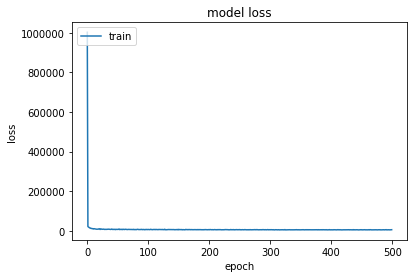

In [17]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### weather prediction

In [18]:
"""y_pred_weather = model.predict(X_test_weather)

plt.scatter(y_test,y_pred_weather, color = 'red')
plt.title('weather only')
plt.legend()
plt.show()
mse = mean_squared_error(y_test, y_pred_weather)
print mse """

"y_pred_weather = model.predict(X_test_weather)\n\nplt.scatter(y_test,y_pred_weather, color = 'red')\nplt.title('weather only')\nplt.legend()\nplt.show()\nmse = mean_squared_error(y_test, y_pred_weather)\nprint mse "

271786.0485602229


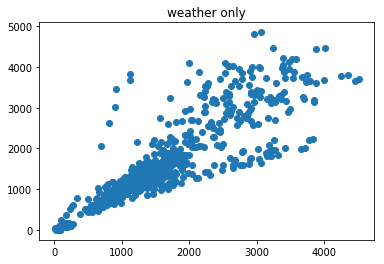

In [20]:
# Get the mean absolute error on the validation data
y_pred_weather = model.predict(X_test_weather)
plt.scatter(y_pred_weather,y_test)
mse = mean_squared_error(y_pred_weather, y_test)
plt.title('weather only')
print mse

### stationary prediction

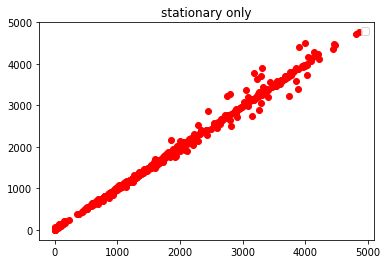

6554.763848017069


In [21]:
#y_pred_stationary = model2.predict(X_test_stationary)
y_pred_stationary = ll.predict(X_test_stationary)
plt.scatter(y_test,y_pred_stationary, color = 'red')
plt.title('stationary only')
plt.legend()
plt.show()
mse2 = mean_squared_error(y_test, y_pred_stationary)
print mse2 

In [22]:
y_test_weather = pd.DataFrame(y_pred_weather)
y_test_stationary = pd.DataFrame(y_pred_stationary)
X_pred = pd.concat([y_test_weather, y_test_stationary],axis=1)
y_pred = classifier.predict(X_pred)

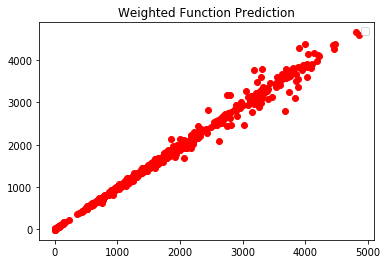

In [23]:
plt.scatter(y_test,y_pred, color = 'red')
plt.title('Weighted Function Prediction')
plt.legend()
plt.show()

In [24]:
mse3 = mean_squared_error(y_test, y_pred)
print mse3 

11291.69743051304


### plot loss history

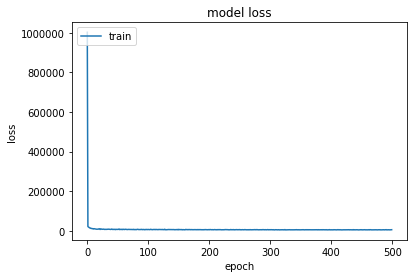

In [25]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Lasso,Ridge
ll = Lasso(alpha=0.1)
ll.fit(X_train, y_train)
pred2 = ll.predict(X_test)
mse2 = mean_squared_error(y_test,pred2)
print mse2

6192.454428006219


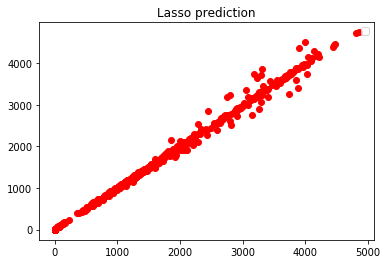

In [27]:
plt.scatter(y_test,pred2, color = 'red')
plt.title('Lasso prediction')
plt.legend()
plt.show()

### random forest for weather - same mse as MLP

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


280109.1430208333


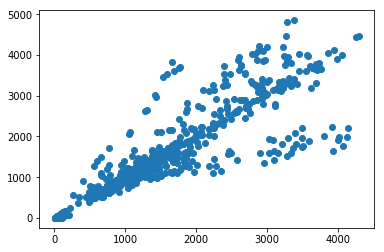

In [28]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_weather,y_train)

# Get the mean absolute error on the validation data
y_test_weather = model.predict(X_test_weather)
plt.scatter(y_test_weather,y_test)
mse = mean_squared_error(y_test_weather, y_test)
print mse

In [30]:
y_train_test_stationary.shape,y_train

((444, 6),      Violet    Blue   Green  Yellow  Orange     Red
 299  1292.0  1666.0  1969.0  2290.0  1834.0  2088.0
 378  2007.0  2619.0  3141.0  3642.0  3199.0  3544.0
 553     0.0     1.0     1.0     1.0     1.0     2.0
 190  1268.0  1603.0  2087.0  2051.0  1855.0  1987.0
 449   843.0  1192.0  1439.0  1696.0  1461.0  1721.0
 31    582.0   858.0   805.0  1038.0   683.0   892.0
 500   143.0   195.0   228.0   254.0   210.0   248.0
 393  1908.0  2504.0  3069.0  3530.0  3118.0  3420.0
 250   989.0  1180.0  1523.0  1644.0  1303.0  1389.0
 491   549.0   870.0  1230.0  1441.0  1350.0  1645.0
 337   983.0  1249.0  1482.0  1712.0  1377.0  1549.0
 386  1956.0  2556.0  3096.0  3579.0  3152.0  3475.0
 10    533.0   713.0   766.0   940.0   678.0   809.0
 498   377.0   600.0   865.0  1024.0   972.0  1242.0
 112   840.0  1066.0  1287.0  1483.0  1147.0  1276.0
 506   113.0   154.0   185.0   207.0   175.0   217.0
 444   944.0  1335.0  1614.0  1903.0  1638.0  1913.0
 301  2102.0  2787.0  3206.0  3794.0